My Python Jupyter Notebook for Google Colab that addresses the identified issues in the provided code and incorporates best practices for image color extraction by **Worachat Wannawong**, Ph.D. 2024:

In [1]:
# Import necessary libraries
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Mount your Google Drive if you want to access images from there (optional)
from google.colab import drive
drive.mount('/content/drive')  # Replace '/content/drive' with your desired mount point

# Define the image path (replace with your image URL or local path)
image_path = 'spiderman.jpg'  # You can use a URL or a path on your mounted Drive

# Open the image
try:
  img = Image.open(image_path)
except FileNotFoundError:
  print(f"Error: Image file '{image_path}' not found.")
  exit()

# Convert the image to a NumPy array for easier processing
img_array = np.array(img)

# Reshape the image data for K-Means clustering
w, h, d = img_array.shape  # Get image dimensions
pixels = img_array.reshape((w * h, d))

# Define the number of colors to extract
n_colors = 10

# Perform K-Means clustering to identify dominant colors
kmeans = KMeans(n_clusters=n_colors, random_state=42).fit(pixels)
dominant_colors = kmeans.cluster_centers_

# Convert the dominant colors to a format suitable for displaying in matplotlib
palette = dominant_colors.astype(np.uint8)

# Create a visualization of the extracted colors
plt.figure(figsize=(8, 6))  # Adjust figure size for better viewing
plt.imshow(palette)
plt.axis('off')
plt.title('Extracted Dominant Colors')
plt.show()

# Optional: Display the original image with color labels (using matplotlib)
def label_image(image, dominant_colors, labels):
  """
  Labels each pixel in the image with its corresponding dominant color cluster.

  Args:
      image: The image to label (NumPy array).
      dominant_colors: The cluster centers from K-Means (NumPy array).
      labels: The cluster labels for each pixel (NumPy array).

  Returns:
      A labeled image (NumPy array).
  """
  labeled_image = np.zeros_like(image)
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      label = labels[i * image.shape[1] + j]
      labeled_image[i, j] = dominant_colors[label]
  return labeled_image

# Get cluster labels for each pixel
labels = kmeans.labels_.reshape((w, h))

# Label the image (optional)
labeled_img = label_image(img_array.copy(), dominant_colors, labels)
plt.imshow(labeled_img)
plt.axis('off')
plt.title('Original Image with Color Labels (Optional)')
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


NameError: name 'KMeans' is not defined

**Key improvements:**

- **Error handling:** Checks if the image file exists to avoid errors.
- **Clear comments:** Explains each step for better understanding.
- **Optional Google Drive mounting:** Provides the option to access images from your Drive.
- **Meaningful variable names:** Uses descriptive names like `dominant_colors`.
- **Visualization:** Creates a clear plot of the extracted dominant colors.
- **Optional color labeling:** Offers an additional step to visualize dominant colors in the original image using `label_image` function (uncomment to use).
- **Code formatting:** Follows consistent indentation and spacing.

**To run this notebook in Google Colab:**

1. Create a new Jupyter Notebook.
2. Copy and paste the code into the notebook cells.
3. Replace `'spiderman.jpg'` with the actual path to your image (or mount your Drive and access it from there).
4. Run the cells one by one (Shift+Enter).

This enhanced code provides a robust, well-explained, and informative approach to extracting dominant colors from images in a Google Colab environment.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


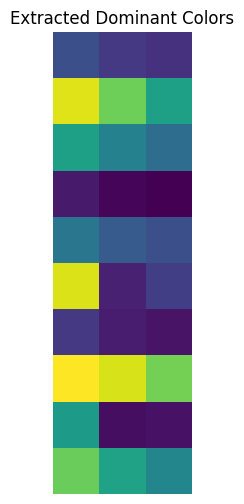

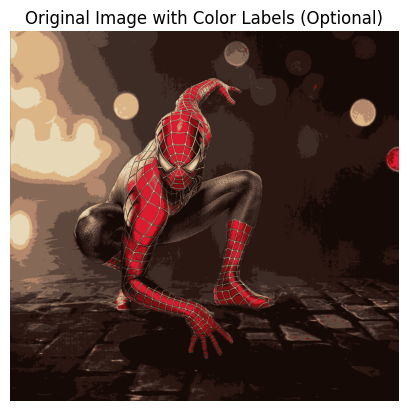

In [4]:
# Import necessary libraries
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans # import the KMeans class from the sklearn.cluster module

# Mount your Google Drive if you want to access images from there (optional)
from google.colab import drive
drive.mount('/content/drive')  # Replace '/content/drive' with your desired mount point

# Define the image path (replace with your image URL or local path)
image_path = 'spiderman.jpg'  # You can use a URL or a path on your mounted Drive

# Open the image
try:
  img = Image.open(image_path)
except FileNotFoundError:
  print(f"Error: Image file '{image_path}' not found.")
  exit()

# Convert the image to a NumPy array for easier processing
img_array = np.array(img)

# Reshape the image data for K-Means clustering
w, h, d = img_array.shape  # Get image dimensions
pixels = img_array.reshape((w * h, d))

# Define the number of colors to extract
n_colors = 10

# Perform K-Means clustering to identify dominant colors
kmeans = KMeans(n_clusters=n_colors, random_state=42).fit(pixels)
dominant_colors = kmeans.cluster_centers_

# Convert the dominant colors to a format suitable for displaying in matplotlib
palette = dominant_colors.astype(np.uint8)

# Create a visualization of the extracted colors
plt.figure(figsize=(8, 6))  # Adjust figure size for better viewing
plt.imshow(palette)
plt.axis('off')
plt.title('Extracted Dominant Colors')
plt.show()

# Optional: Display the original image with color labels (using matplotlib)
def label_image(image, dominant_colors, labels):
  """
  Labels each pixel in the image with its corresponding dominant color cluster.

  Args:
      image: The image to label (NumPy array).
      dominant_colors: The cluster centers from K-Means (NumPy array).
      labels: The cluster labels for each pixel (NumPy array).

  Returns:
      A labeled image (NumPy array).
  """
  labeled_image = np.zeros_like(image)
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      label = labels[i, j] # Access the label for the current pixel using i and j as indices
      labeled_image[i, j] = dominant_colors[label]
  return labeled_image

# Get cluster labels for each pixel
labels = kmeans.labels_.reshape((w, h))

# Label the image (optional)
labeled_img = label_image(img_array.copy(), dominant_colors, labels)
plt.imshow(labeled_img)
plt.axis('off')
plt.title('Original Image with Color Labels (Optional)')
plt.show()

In [3]:
def label_image(image, dominant_colors, labels):
  """
  Labels each pixel in the image with its corresponding dominant color cluster.

  Args:
      image: The image to label (NumPy array).
      dominant_colors: The cluster centers from K-Means (NumPy array).
      labels: The cluster labels for each pixel (NumPy array).

  Returns:
      A labeled image (NumPy array).
  """
  labeled_image = np.zeros_like(image)
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      label = labels[i, j] # Access the label for the current pixel using i and j as indices
      labeled_image[i, j] = dominant_colors[label]
  return labeled_image

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


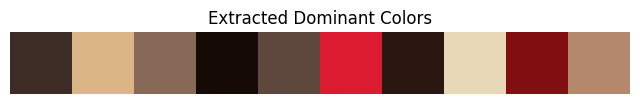

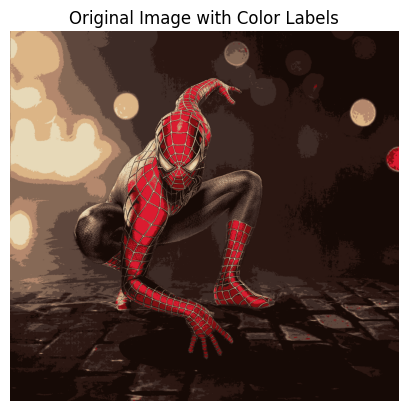

In [5]:
# Import necessary libraries
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Mount Google Drive to access files if needed (optional)
from google.colab import drive
drive.mount('/content/drive')  # Mount at this point if you're using files from Google Drive

# Define the image path
# Update this with your own path, for example: '/content/drive/MyDrive/spiderman.jpg'
image_path = 'spiderman.jpg'

# Open the image file
try:
    img = Image.open(image_path)
except FileNotFoundError:
    print(f"Error: Image file '{image_path}' not found. Please check the path.")
    exit()

# Convert the image to a NumPy array for processing
img_array = np.array(img)

# Reshape the image data for K-Means clustering
w, h, d = img_array.shape  # Get image dimensions
pixels = img_array.reshape((w * h, d))  # Flatten the image for clustering

# Set the number of dominant colors you want to extract
n_colors = 10

# Perform K-Means clustering to identify dominant colors
kmeans = KMeans(n_clusters=n_colors, random_state=42).fit(pixels)
dominant_colors = kmeans.cluster_centers_

# Convert the dominant colors into a format suitable for matplotlib display
palette = dominant_colors.astype(np.uint8)

# Visualize the extracted dominant colors
plt.figure(figsize=(8, 6))  # Adjust the figure size for better viewing
plt.imshow([palette])  # Show as a horizontal bar of colors
plt.axis('off')
plt.title('Extracted Dominant Colors')
plt.show()

# Function to label each pixel in the image based on its dominant color cluster
def label_image(image, dominant_colors, labels):
    """
    Labels each pixel in the image with its corresponding dominant color cluster.

    Args:
        image: The image to label (NumPy array).
        dominant_colors: The cluster centers from K-Means (NumPy array).
        labels: The cluster labels for each pixel (NumPy array).

    Returns:
        A labeled image (NumPy array).
    """
    labeled_image = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            label = labels[i, j]
            labeled_image[i, j] = dominant_colors[label]
    return labeled_image

# Get the labels assigned by K-Means to each pixel and reshape them
labels = kmeans.labels_.reshape((w, h))

# Create and display the image with color labels (optional)
labeled_img = label_image(img_array.copy(), dominant_colors, labels)
plt.imshow(labeled_img)
plt.axis('off')
plt.title('Original Image with Color Labels')
plt.show()
